In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, cross_val_score
from scipy.optimize import curve_fit

In [2]:
df = pd.DataFrame(np.genfromtxt("data/dogecoin_data_1_year.csv", delimiter=';', dtype=None, encoding=None))

In [3]:
new_headers = df.iloc[0]
df.columns = new_headers
df = df[1:]

In [4]:
df.drop(['timestamp', 'name', '\ufefftimeOpen', 'marketCap', 'timeHigh', 'timeLow'], axis=1, inplace=True)

In [5]:
df['timeClose'] = df['timeClose'].str.replace('"', '')
df['timeClose'] = df['timeClose'].str.replace('T23:59:59.999Z', '')
df['timeClose'] = df['timeClose'].str.replace('-', '')

In [6]:
df["timeClose"] = pd.to_datetime(df["timeClose"])
df["timeClose"] = (df["timeClose"] - df["timeClose"].iloc[-1])

In [7]:
df["timeClose"] = df["timeClose"].dt.days.astype(int)
df["close"] = (df["close"].astype(float))
df["open"] = (df["open"].astype(float))
df["high"] = (df["high"].astype(float))
df["low"] = (df["low"].astype(float))
df["volume"] = (df["volume"].astype(float))

In [37]:
X = df['timeClose'].values.reshape(-1, 1)
y = df['close'].values.reshape(-1, 1)
X_multi = df[['timeClose', 'open', 'high', 'low', 'volume']]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y, test_size=0.2)

In [39]:
degree = 6
polyreg = Pipeline([
    ('poly', PolynomialFeatures(degree=degree)),
    ('linear', LinearRegression())
])
polyreg.fit(X_train, y_train)

line_of_best_fit = LinearRegression()
line_of_best_fit.fit(X_train, y_train)

model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train_multi)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [40]:
y_pred = polyreg.predict(X_test)
r2 = r2_score(y_test, y_pred)
y_pred_lobf = line_of_best_fit.predict(X_test)
r2_lobf = r2_score(y_test, y_pred_lobf)
y_pred_multi = model_multi.predict(X_test_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)
print(r2)
print(r2_lobf)
print(r2_multi)

0.7806165243848434
0.06363264514943778
0.9926945508313252


In [41]:
print(f"Cross validation for multivariable regression: {str(cross_val_score(polyreg, X_test, y_test, cv=10).mean())}")
print(f"MSE for multivariable regression: {str(mean_squared_error(y_test, y_pred))}")
print(f"MAPE for multivariable regression: {str(round(mean_absolute_percentage_error(y_test, y_pred) * 100, 5))}% \n")
print("Cross validation for polynomial regression: " + str(cross_val_score(line_of_best_fit, X_test, y_test, cv=10).mean()))
print("MSE for polynomial regression: " + str(mean_squared_error(y_test, y_pred_lobf)))
print(f"MAPE for polynomial regression: {str(round(mean_absolute_percentage_error(y_test, y_pred_lobf) * 100, 5))}% \n")
print(f"Cross validation for multivariable regression: {str(cross_val_score(model_multi, X_test_multi, y_test_multi, cv=10).mean())}")
print(f"MSE for multivariable regression: {str(mean_squared_error(y_test_multi, y_pred_multi))}")
print(f"MAPE for multivariable regression: {str(round(mean_absolute_percentage_error(y_test_multi, y_pred_multi) * 100, 5))}% \n")

Cross validation for multivariable regression: 0.7358369221259966
MSE for multivariable regression: 0.0016540661168988609
MAPE for multivariable regression: 14.24094% 

Cross validation for polynomial regression: -0.17302453647676447
MSE for polynomial regression: 0.0070598458260614965
MAPE for polynomial regression: 27.78511% 

Cross validation for multivariable regression: 0.9935248016761872
MSE for multivariable regression: 4.071758845673672e-05
MAPE for multivariable regression: 1.91545% 



In [35]:
full_y_pred = polyreg.predict(X)
full_y_pred_lobf = line_of_best_fit.predict(X)

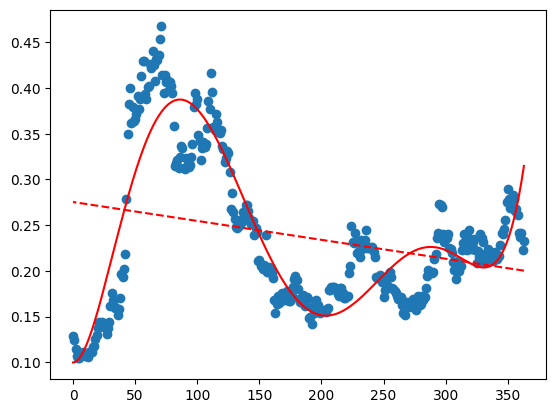

In [36]:
plt.scatter(X, y)
plt.plot(X, full_y_pred, color='red', label='Line of Best Fit')
plt.plot(X, full_y_pred_lobf, color='red', label='Line of Best Fit', linestyle='--')
plt.show()